# Proyek Klasifikasi Gambar: Intel Image Classification
- **Nama:** Rizky Prayogi Reksomulyo
- **Email:** rizki45645@gmail.com
- **ID Dicoding:** ogiiii

## Import Semua Packages/Library yang Digunakan

In [58]:
 pip freeze requirements.txt

absl-py==1.4.0
accelerate==1.3.0
aiohappyeyeballs==2.4.6
aiohttp==3.11.13
aiosignal==1.3.2
alabaster==1.0.0
albucore==0.0.23
albumentations==2.0.4
ale-py==0.10.2
altair==5.5.0
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.6.0
arviz==0.20.0
astropy==7.0.1
astropy-iers-data==0.2025.2.24.0.34.4
astunparse==1.6.3
atpublic==4.1.0
attrs==25.1.0
audioread==3.0.1
autograd==1.7.0
babel==2.17.0
backcall==0.2.0
beautifulsoup4==4.13.3
betterproto==2.0.0b6
bigframes==1.38.0
bigquery-magics==0.6.0
bleach==6.2.0
blinker==1.9.0
blis==0.7.11
blosc2==3.2.0
bokeh==3.6.3
Bottleneck==1.4.2
bqplot==0.12.44
branca==0.8.1
CacheControl==0.14.2
cachetools==5.5.2
catalogue==2.0.10
certifi==2025.1.31
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.1
chex==0.1.89
clarabel==0.10.0
click==8.1.8
cloudpathlib==0.20.0
cloudpickle==3.1.1
cmake==3.31.4
cmdstanpy==1.2.5
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.5
cons==0.4.

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
import tensorflow as tf
import os
import tensorflowjs as tfjs
from sklearn.model_selection import train_test_split
from tensorflow import keras
import tensorflow.keras.models as Models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, BatchNormalization, Dropout, MaxPooling2D
from tensorflow.keras.optimizers import Adamax
from keras.callbacks import  EarlyStopping

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Preparation

In [28]:
def print_images_resolution(directory):
    unique_sizes = set()
    total_images = 0

    for subdir in os.listdir(directory):
        subdir_path = os.path.join(directory, subdir)
        image_files = os.listdir(subdir_path)
        num_images = len(image_files)
        print(f"{subdir}: {num_images}")
        total_images += num_images

        for img_file in image_files:
            img_path = os.path.join(subdir_path, img_file)
            with Image.open(img_path) as img:
                unique_sizes.add(img.size)

        for size in unique_sizes:
            print(f"- {size}")
        print("---------------")

    print(f"\nTotal: {total_images}")

### Data Loading

In [29]:
train_data = '/content/drive/MyDrive/Dataset/seg_train'
test_data = '/content/drive/MyDrive/Dataset/seg_test'

filepath= []
label =[]

folds = os.listdir(train_data)

for fold in folds:
    f_path = os.path.join(train_data , fold)
    imgs = os.listdir(f_path)

    for img in imgs:
        img_path = os.path.join(f_path , img)
        filepath.append(img_path)
        label.append(fold)

#Concat data paths with labels
fseries = pd.Series(filepath , name= 'filepaths')
lseries = pd.Series(label , name = 'labels')


In [30]:
folds = os.listdir(test_data)

for fold in folds:
    f_path = os.path.join(test_data , fold)
    imgs = os.listdir(f_path)

    for img in imgs:
        img_path = os.path.join(f_path , img)
        filepath.append(img_path)
        label.append(fold)

#Concat data paths with labels
fseries = pd.Series(filepath , name= 'filepaths')
lseries = pd.Series(label , name = 'labels')
train_df = pd.concat([fseries , lseries] , axis = 1)

In [31]:
print_images_resolution(train_data)

building: 2628
- (150, 124)
- (150, 150)
---------------
glacier: 2957
- (150, 146)
- (150, 120)
- (150, 149)
- (150, 110)
- (150, 134)
- (150, 123)
- (150, 142)
- (150, 119)
- (150, 97)
- (150, 135)
- (150, 102)
- (150, 76)
- (150, 105)
- (150, 150)
- (150, 124)
- (150, 143)
- (150, 111)
- (150, 72)
---------------
mountain: 3037
- (150, 136)
- (150, 81)
- (150, 145)
- (150, 142)
- (150, 105)
- (150, 102)
- (150, 111)
- (150, 120)
- (150, 123)
- (150, 135)
- (150, 141)
- (150, 144)
- (150, 150)
- (150, 147)
- (150, 110)
- (150, 113)
- (150, 119)
- (150, 131)
- (150, 76)
- (150, 134)
- (150, 143)
- (150, 146)
- (150, 149)
- (150, 100)
- (150, 97)
- (150, 103)
- (150, 124)
- (150, 72)
---------------
sea: 2784
- (150, 136)
- (150, 81)
- (150, 145)
- (150, 142)
- (150, 105)
- (150, 102)
- (150, 111)
- (150, 120)
- (150, 123)
- (150, 135)
- (150, 141)
- (150, 144)
- (150, 150)
- (150, 147)
- (150, 110)
- (150, 113)
- (150, 119)
- (150, 131)
- (150, 76)
- (150, 134)
- (150, 140)
- (150, 14

In [32]:
print_images_resolution(test_data)

building: 437
- (150, 150)
---------------
glacier: 553
- (150, 149)
- (150, 110)
- (150, 76)
- (150, 150)
- (150, 72)
---------------
mountain: 525
- (150, 149)
- (150, 110)
- (150, 81)
- (150, 131)
- (150, 76)
- (150, 150)
- (150, 72)
---------------
sea: 510
- (150, 149)
- (150, 110)
- (150, 81)
- (150, 131)
- (150, 76)
- (150, 150)
- (150, 72)
---------------

Total: 2025


### Data Preprocessing

#### Split Dataset

In [33]:
train , test = train_test_split(train_df , test_size= 0.2 , shuffle = True , random_state = 42)

In [34]:
train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

train_gen = train_datagen.flow_from_dataframe(train , x_col = 'filepaths' , y_col = 'labels' , target_size = (180 , 180) ,
                                      class_mode = 'categorical' , color_mode = 'rgb' , shuffle = True , batch_size= 32)

test_gen = test_datagen.flow_from_dataframe(test , x_col= 'filepaths' , y_col = 'labels' , target_size = (180 , 180) ,
                                      class_mode = 'categorical' , color_mode= 'rgb' , shuffle = False , batch_size = 32)

Found 10744 validated image filenames belonging to 4 classes.
Found 2687 validated image filenames belonging to 4 classes.


In [35]:
print(train_df['labels'].unique())

['building' 'glacier' 'mountain' 'sea']


## Modelling

In [36]:
img_shape = (180 , 180 , 3)
base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top= False,
                                                               weights= 'imagenet',
                                                               input_shape= img_shape,
                                                               )

model = Sequential([
    base_model,
    BatchNormalization(axis = -1 , momentum = 0.99 , epsilon = 0.001),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256 , activation= 'relu'),
    Dense(512 , activation= 'relu'),
    Dense(4 , activation= 'softmax')
])
model.compile(Adamax(),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])


In [37]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        train_acc = logs.get('accuracy')
        val_acc = logs.get('val_accuracy')

        if train_acc is not None and val_acc is not None:
            if train_acc >= 0.95 and val_acc >= 0.95:
                print(f"\nAkurasi training dan validasi telah mencapai 96% pada epoch {epoch+1}. Menghentikan pelatihan.")
                self.model.stop_training = True

callbacks = MyCallback()

In [38]:
epochs=10
history = model.fit(
  train_gen,
  validation_data=test_gen,
  epochs=epochs,
  batch_size=32,
  callbacks=callbacks
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
336/336 ━━━━━━━━━━━━━━━━━━━━ 190s 322ms/step - accuracy: 0.8414 - loss: 0.4376 - val_accuracy: 0.9386 - val_loss: 0.1688
Epoch 2/10
336/336 ━━━━━━━━━━━━━━━━━━━━ 56s 167ms/step - accuracy: 0.9630 - loss: 0.1089 - val_accuracy: 0.9416 - val_loss: 0.1650
Epoch 3/10
336/336 ━━━━━━━━━━━━━━━━━━━━ 56s 166ms/step - accuracy: 0.9777 - loss: 0.0626 - val_accuracy: 0.9364 - val_loss: 0.2341
Epoch 4/10
336/336 ━━━━━━━━━━━━━━━━━━━━ 56s 167ms/step - accuracy: 0.9846 - loss: 0.0441 - val_accuracy: 0.9457 - val_loss: 0.2010
Epoch 5/10
336/336 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.9908 - loss: 0.0261
Akurasi training dan validasi telah mencapai 96% pada epoch 5. Menghentikan pelatihan.
336/336 ━━━━━━━━━━━━━━━━━━━━ 56s 167ms/step - accuracy: 0.9908 - loss: 0.0261 - val_accuracy: 0.9524 - val_loss: 0.1841


## Evaluasi dan Visualisasi

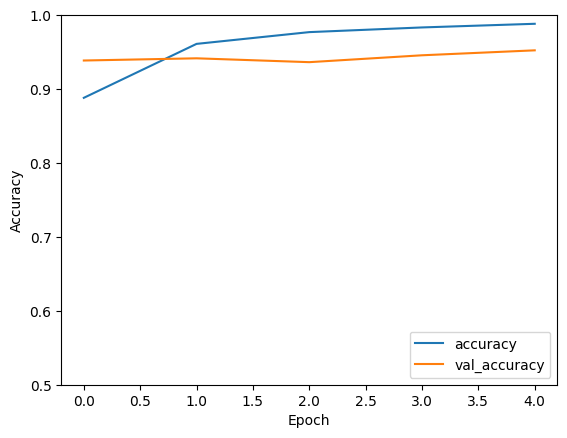

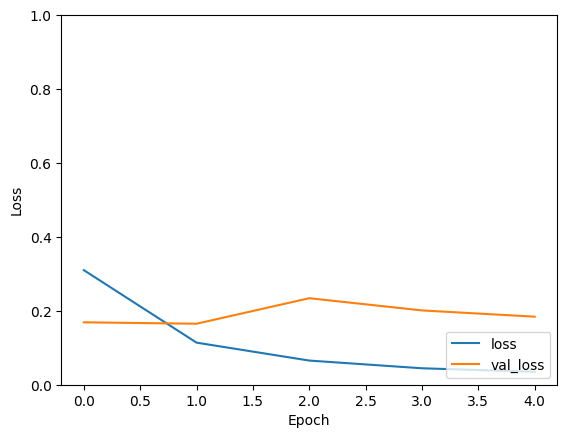

In [39]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.show()

## Konversi Model

In [40]:
model.save('model1.h5')

In [41]:
save_path = '/content/drive/MyDrive/archive/'
tf.saved_model.save(model, save_path)

In [55]:
# Load the saved Keras model
model = keras.models.load_model('/content/model1.h5')

# Convert the loaded model to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)  # Pass the loaded model object
tflite_model = converter.convert()

# Save the TFLite model
with tf.io.gfile.GFile('model_name.tflite', 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmp_fh7ylzx'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name='input_layer_5')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  133415372669392: TensorSpec(shape=(1, 1, 1, 3), dtype=tf.float32, name=None)
  133415372669584: TensorSpec(shape=(1, 1, 1, 3), dtype=tf.float32, name=None)
  133415372669200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133415372670544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133415372671504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133415372670736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133415372669776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133415372672464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133415372672080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133415372673424: TensorSpec(shape=(), dtype=tf.resource, name=Non

In [45]:
!tensorflowjs_converter \
    --input_format keras \
    model1.h5 \
    /content/drive/MyDrive/archive/tfjs_model

2025-03-06 16:44:05.738866: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741279445.760338   17519 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741279445.766688   17519 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
failed to lookup keras version from the file,
    this is likely a weight only file
weight normalization_2/count with shape () and dtype int64 was auto converted to the type int32


## Inference (Optional)

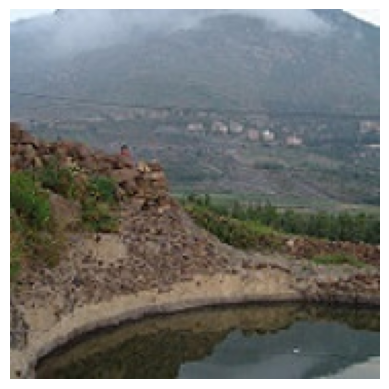

Predicted class: Mountain


In [57]:
interpreter = tf.lite.Interpreter(model_path="/content/drive/MyDrive/archive/tflite/model_name.tflite")
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

image_path = "/content/drive/MyDrive/archive/Dataset/seg_test/mountain/20058.jpg"
image = Image.open(image_path)
image = image.resize((180, 180))


plt.imshow(image)
plt.axis('off')  # Menonaktifkan sumbu
plt.show()
image_array = np.array(image)
input_data = np.expand_dims(image_array, axis=0)
input_data = input_data.astype(np.float32)

interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

output_data = interpreter.get_tensor(output_details[0]['index'])

predicted_class = np.argmax(output_data)

if predicted_class == 0:
    print("Predicted class: Buildings")
elif predicted_class == 1:
    print("Predicted class: Glacier")
elif predicted_class == 2:
    print("Predicted class: Mountain")
else:
    print("Predicted class: Sea")